<a href="https://colab.research.google.com/github/Sid2601/Air_Quality-Prediction-using-PCA/blob/master/Air_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt

In [17]:
air_data = pd.read_excel('/content/AirQualityUCI.xlsx')

In [18]:
air_data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [19]:
air_data.shape

(9357, 15)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=air_data.drop(['Date', 'Time','AH'], axis=1)
X=scaler.fit_transform(X)
X


array([[0.95611137, 0.69650631, 0.25197984, ..., 0.53897714, 0.87326247,
        0.86197939],
       [0.95327985, 0.66625739, 0.22462203, ..., 0.43053898, 0.87203598,
        0.85790977],
       [0.95422369, 0.7152584 , 0.20734341, ..., 0.46790928, 0.86631235,
        0.87964326],
       ...,
       [0.95516753, 0.59917401, 0.        , ..., 0.47452025, 0.92763696,
        0.75625595],
       [0.95375177, 0.53689028, 0.        , ..., 0.35616564, 0.93346279,
        0.73963114],
       [0.95422369, 0.56736243, 0.        , ..., 0.37315214, 0.93417825,
        0.73815915]])

In [21]:
Y=air_data.AH
print(Y)


0       0.757754
1       0.725487
2       0.750239
3       0.786713
4       0.788794
          ...   
9352    0.756824
9353    0.711864
9354    0.640649
9355    0.513866
9356    0.502804
Name: AH, Length: 9357, dtype: float64


In [60]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)

In [61]:
pca.get_covariance()

array([[ 1.26140584e-01,  3.87575929e-03,  4.29247946e-03,
        -3.68103435e-03,  4.28089907e-03,  3.66232040e-02,
        -8.54651793e-03,  6.59987145e-02, -4.11602139e-03,
         9.60358416e-03, -7.98287053e-03, -6.46289999e-03],
       [ 3.87575929e-03,  2.77725161e-02,  1.37307446e-03,
         1.96371413e-02,  1.67674095e-02,  4.12327904e-03,
         4.15030953e-03,  4.52258484e-03,  1.79699527e-02,
         1.80600848e-02,  2.06130909e-02,  2.00135472e-02],
       [ 4.29247946e-03,  1.37307446e-03,  9.52252787e-03,
         1.18917277e-03,  1.27158677e-03,  1.54021095e-03,
        -1.67553764e-05,  2.58070489e-03,  1.06241634e-03,
         1.54191232e-03,  1.10613337e-03,  1.11840144e-03],
       [-3.68103435e-03,  1.96371413e-02,  1.18917277e-03,
         3.06615491e-02,  1.77560491e-02,  1.97638452e-03,
         5.04046445e-03,  4.32318613e-04,  1.96143220e-02,
         1.87894826e-02,  2.27184635e-02,  2.19711566e-02],
       [ 4.28089907e-03,  1.67674095e-02,  1.2715867

In [62]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.4263395 , 0.35139688])

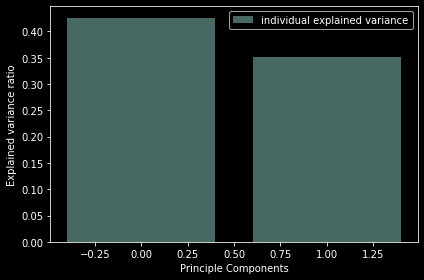

In [63]:
with plt.style.context('dark_background'):
  plt.figure(figsize=(6,4))
  plt.bar(range(2), explained_variance, alpha=0.5, align = 'center', label = 'individual explained variance')
  plt.ylabel('Explained variance ratio')
  plt.xlabel('Principle Components')
  plt.legend(loc='best')
  plt.tight_layout()

In [64]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, Y, test_size = 0.3, random_state=2)

In [40]:
print(X_train_new.shape)
print(X_test_new.shape)
print(y_train.shape)
print(y_test.shape)

(6549, 8)
(2808, 8)
(6549,)
(2808,)


In [65]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

model = Sequential()

model.add(Dense(300,input_shape=(2,),activation='relu'))

model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='linear'))

model.compile(Adam(lr=0.01),'mean_squared_error')

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 300)               900       
_________________________________________________________________
dense_32 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_33 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_34 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 11        
Total params: 36,571
Trainable params: 36,571
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.fit(X_train_new,y_train,epochs=100)

Epoch 1/100
205/205 [==============================] - 0s 2ms/step - loss: 95.9438
Epoch 2/100
205/205 [==============================] - 0s 2ms/step - loss: 9.0536
Epoch 3/100
205/205 [==============================] - 0s 2ms/step - loss: 3.2386
Epoch 4/100
205/205 [==============================] - 0s 2ms/step - loss: 15.3855
Epoch 5/100
205/205 [==============================] - 0s 2ms/step - loss: 0.9892
Epoch 6/100
205/205 [==============================] - 0s 2ms/step - loss: 4.4671
Epoch 7/100
205/205 [==============================] - 0s 2ms/step - loss: 10.6220
Epoch 8/100
205/205 [==============================] - 0s 2ms/step - loss: 1.1756
Epoch 9/100
205/205 [==============================] - 0s 2ms/step - loss: 0.2116
Epoch 10/100
205/205 [==============================] - 0s 2ms/step - loss: 0.3307
Epoch 11/100
205/205 [==============================] - 0s 2ms/step - loss: 2.9005
Epoch 12/100
205/205 [==============================] - 0s 2ms/step - loss: 0.2697
Epoch 13/1

In [67]:
result = model.evaluate(X_test_new, y_test)
print(result)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

88/88 [==============================] - 0s 1ms/step - loss: 0.2603
0.2602933645248413
Accuracy : 0.7397066354751587


#Output According PCA

1) n_components = 12 : -->Accuracy: 0.888292983174324

2) n_components = 10 : -->Accuracy:0.9939798484556377

3) n_components = 8  : -->Accuracy: 0.9157441258430481

4) n_components = 5  : -->Accuracy: 0.9573804698884487

5) n_components = 2  : -->Accuracy :0.7397066354751587